In [3]:
library(tidyverse)
library(ggplot2)

Let's use the code provided below to generate a dataset representing two populations, each sampled from a Guassian with a specific population mean. Here I am generating only 5 samples

In [18]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 12, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
12.52232,Site 2
11.95539,Site 2
13.48441,Site 2
10.40899,Site 2


* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [19]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 12.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed.

In [20]:
# Write your code here
tapply(complete_data$measure,complete_data$site_name,mean)


Site 1   Site 2 
10.84913 12.11935

Q.2 

* Use the bootstrapping-procedure covered in class to assess whether there is a statistically significant difference between the data in `Site 1` and that in `Site 2`.

Make sure you follow the approach discussed in class and which consists of:

1. Selecting an appropriate test statistic
2. Bootstrapping a a distribuion for the observed statistic under the null hypothesis
3. Desciding whether to accept or reject the null based on the probability of the null
4. provide a p-value to support your decision.


In [4]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 14, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)

#### Q2.0 

Complete the following by describing the null and the alternative hypotheses we are testing here.


### Write your answer here
`Null hypothesis`: data_1 and data_2 come from the same distribution.
`Alternative hypothesis`: data_1 and data_2 come from different distributions.

#### Q.2.1 

Produce a graph similar the one below (geom_density) display the distributions. If you're using the same seed as mine, your graph will look exactly the same as the one below 

![](https://www.dropbox.com/s/rz5jxm84kk8ac1m/dist.png?dl=1)

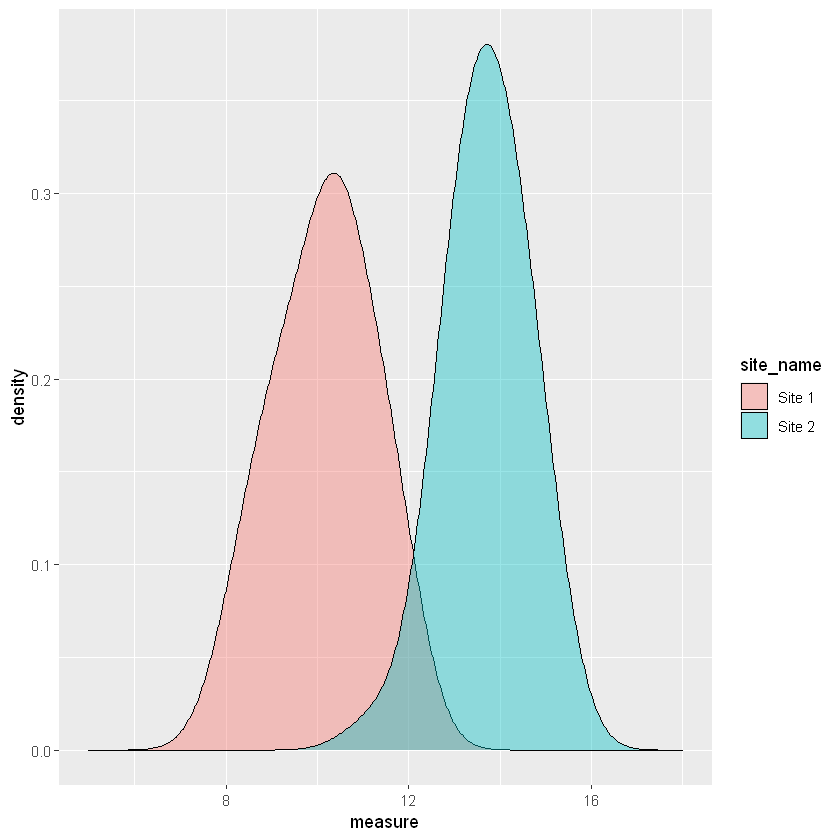

In [5]:
# write your code here
ggplot(complete_data, aes(x = measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.65) + 
  xlim(5,18)

Q2.2 Select a proper test statistic and produce a distribution of the statistic under the null hypothesis. Plot the data as both a histogram and density curves. Your graph may look like this.

![](https://www.dropbox.com/s/3jarqg9swneai0r/mean_under_null.png?dl=1)

In [ ]:
# Write your code here
processOneIter = function(data_1, data_2){
    
    concat_data = c(data_1, data_2)
    len_concat_data = length(concat_data)
    
    len_data_1 = length(data_1)    
    shuffled_data = sample(concat_data)
    new_data_1 = shuffled_data[1:len_data_1]
    new_data_2 = shuffled_data[(len_data_1+1):len_concat_data]
    mean(new_data_1) - mean(new_data_2)
    
}
processOneIter(data_1, data_2)

In [ ]:
mean_under_null = replicate(1000, processOneIter(data_1, data_2))

ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null, ), bw=0.2, size=1.5) + 
  xlim(-2.5, 2.5)

####  Q2.3. 

Calculate and plot the observed statistic on the graph you created in Q.2.2. 


In [17]:
#### Q2.4 compute the p-vlaue of the observed statistic under the null. What do you conclude about the hypotheses you enunciated in Q
t.test(data_1$measure, data_2$measure)


	Welch Two Sample t-test

data:  data_1$measure and data_2$measure
t = -16.777, df = 74.217, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.975853 -3.131763
sample estimates:
mean of x mean of y 
 10.14979  13.70360 


I accept the Null Hypothesis (Ho) and reject the Alternative Hypothesis (Ha).

#### Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed site Y with different environmental conditions and obtains the following proportions for the three corals (0.61, 0.19, 0.20). Use the multinomial non-parametric hypotheses test to assess whether the proportions obtained at sites X and Y are statistically different.


Although not explicitly required, your test should cover all the steps in Q2, i.e. appropriate graph(s) when possible, test statistics, and conclusion.

In [ ]:
sample(c('P. lobata', 'M. capitata', 'P. mendrina'), 200, replace=TRUE, prob=c(0.60,0.19,0.21))
data_X$site_name <- 'Site X'
data_Y$site_name <- 'Site Y'
complete_data = rbind(data_X, data_Y)

In [18]:
type = c('P. lobata', 'P. lobata', 'M. capitata', 'M. capitata', 'P. mendrina', 'P. mendrina')
ratios = c(0.60, 0.61, 0.19, 0.19, 0.21, 0.20)
site = rep(c("Site X", "Site Y"), 3)


coral_proportions = tibble(type, ratios, site)
coral_proportions

type,ratios,site
<chr>,<dbl>,<chr>
P. lobata,0.60,Site X
P. lobata,0.61,Site Y
M. capitata,0.19,Site X
M. capitata,0.19,Site Y
P. mendrina,0.21,Site X
P. mendrina,0.20,Site Y


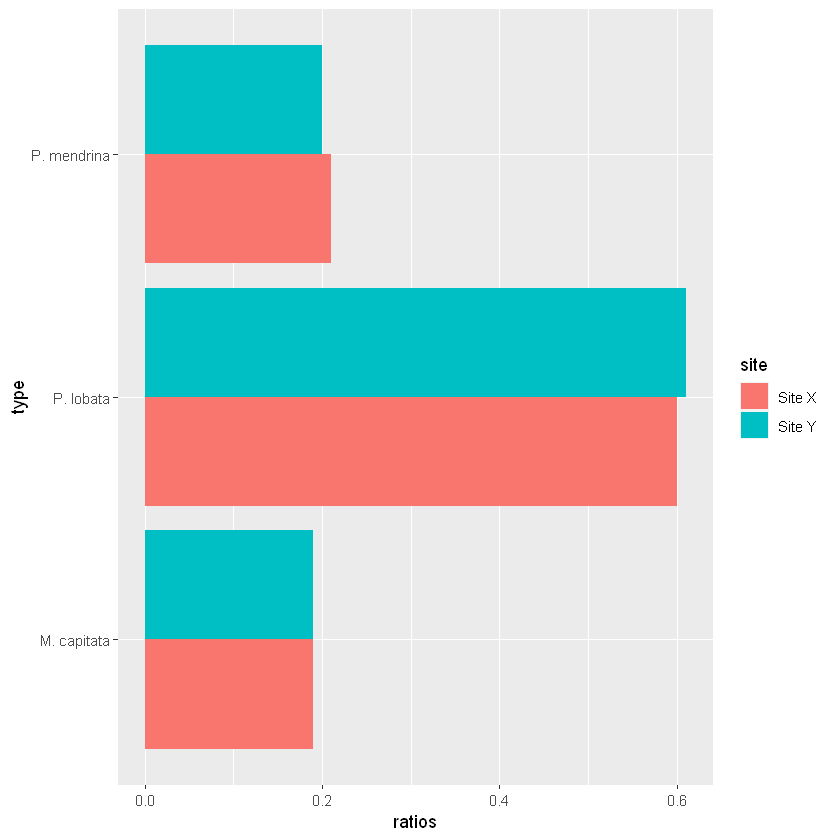

In [33]:
ggplot(coral_proportions, aes(fill=site, y=ratios, x=type)) + 
    geom_bar(position="dodge", stat="identity") +
    coord_flip()

In [20]:
subtract = function(x){
    x[1] - x[2]
}

subtract(c(20, 15))

[1] 5

In [22]:
tapply(coral_proportions$ratios, coral_proportions$type, subtract)

M. capitata   P. lobata P. mendrina 
       0.00       -0.01        0.01

In [24]:
subtract_abs = function(x){
    abs(x[1] - x[2])
}


observed_stat = sum(tapply(coral_proportions$ratios, coral_proportions$type, subtract_abs))/2
observed_stat

[1] 0.01

After using the hypotheses test, the proportions obtained at sites X and Y are not statistically different.
The Null Hypothesis (Ho) is accepted, and the Alternative Hypothesis (Ha) is rejected.